In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
# from torch.utils.data import DataLoader
import seaborn as sns
import pandas as pd
from scipy.spatial import ConvexHull
# from torchvision import transforms

import os
import sys
import pandas as pd
sys.path.append('./Codebase/qsar')
from Data_integration import Data_Integration
from Data_preprocess import Data_preprocess
data_path = './raw_data_features/RDK7.csv'
activity_col = 'pChEMBL Value'
task_type = 'C'
target_thresh = 7
var_thresh = 0.05
scoring = 'f1'
data = pd.read_csv(data_path, index_col=0)
data.head(2)

,Canomicalsmiles,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
pChEMBL Value,,,,,,,,,,,,,,,,,,,,,
9.30,O=C(NCc1ccc(F)cc1)c1nc(N2CCCCS2(=O)=O)c2cccnc2c1O,1,0,1,0,0,1,0,0,1,...,1,1,1,0,0,0,0,1,0,0
9.22,NC(=O)c1c2c(c(O)c3ncc(Cc4cccc(Cl)c4F)cc13)C(=O...,1,1,0,0,0,1,0,1,1,...,1,1,0,0,0,1,0,0,0,0


Data train: (1995, 4097)
Data test: (499, 4097)
***************************************************************************


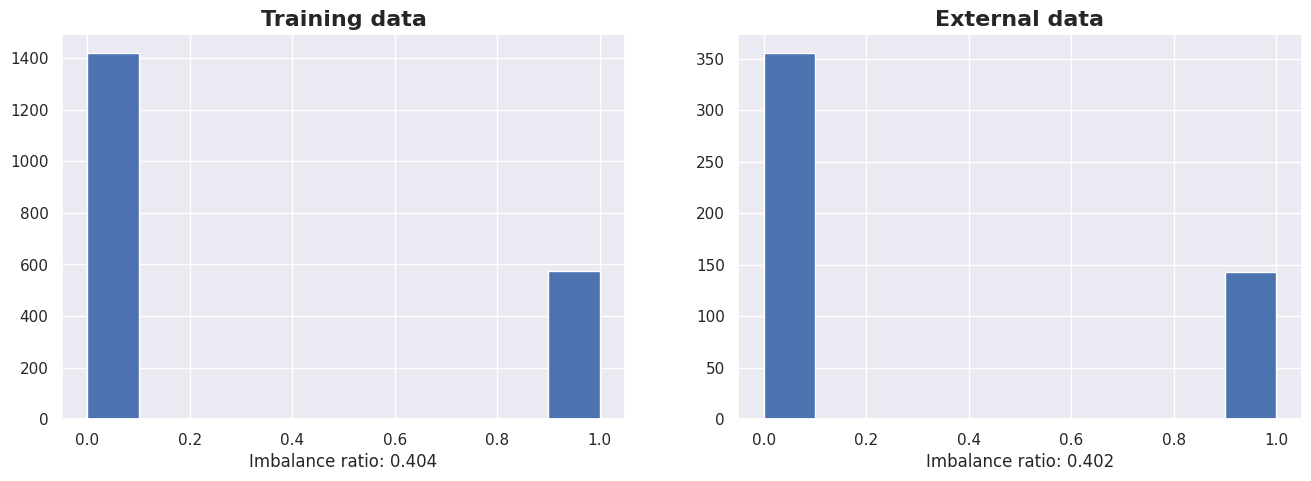

Total duplicated rows-train: 63
Data train before drop duplicates: 1995
Data train after drop duplicates: 1932
***************************************************************************
Total duplicated rows-test: 4
Data test before drop duplicates: 499
Data test after drop duplicates: 495
***************************************************************************
Index(['2342'], dtype='object')
Total similar columns: 1
Data train before drop duplicates: (1932, 4097)
Data after drop duplicates: (1932, 4096)
***************************************************************************
Data test before drop duplicates: (495, 4097)
Data test after drop duplicates: (495, 4096)
***************************************************************************
Empty DataFrame
Columns: [ColumnName, TotalMissingVals, PercentMissing]
Index: []
Drop_cols []
Total missing value-train 0
Total missing value-test 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095


Total row-test with missing value 0
(1932, 4095) (1932,)
>Threshold=0.00, Features=4095
>Threshold=0.05, Features=4058
>Threshold=0.10, Features=3645
>Threshold=0.15, Features=2721
>Threshold=0.20, Features=1619


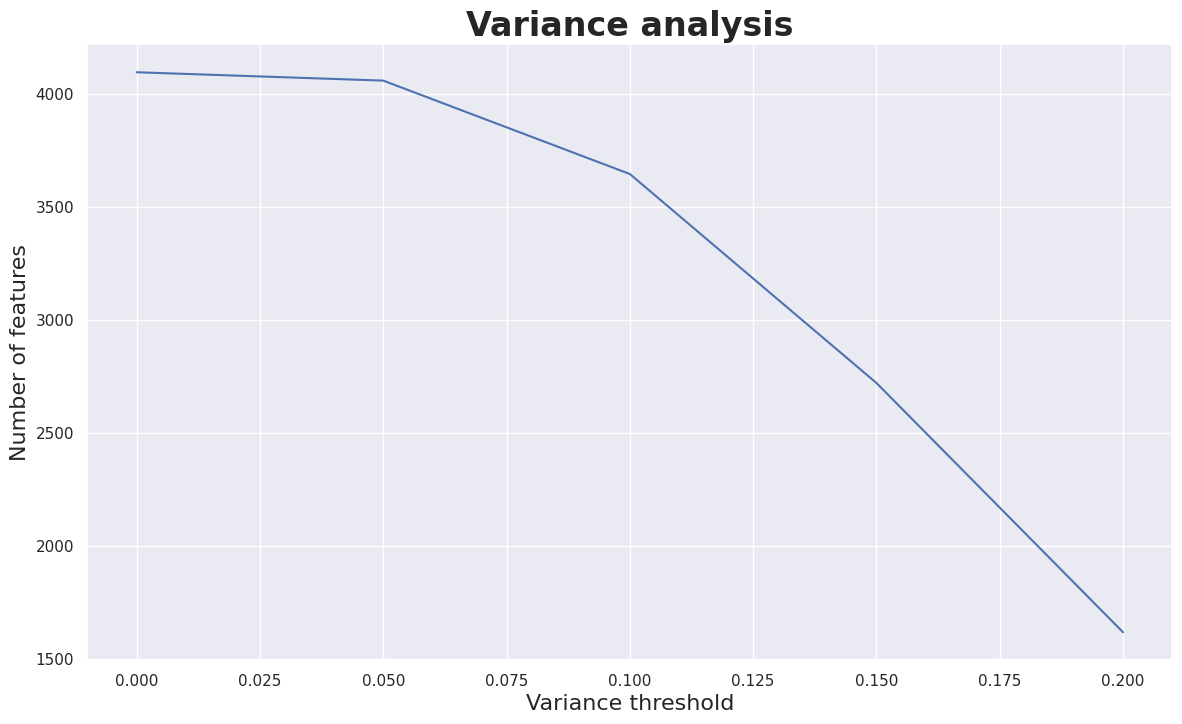

***************************************************************************


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [10]:
integration = Data_Integration(data=data, activity_col='pChEMBL Value', 
                                       task_type ='C', target_thresh=7)
integration.fit()
Data_train = integration.data_train
Data_test = integration.data_test
# 2. Data preprocess
preprocess = Data_preprocess(Data_train, Data_test, var_thresh = 0.05,
                             activity_col ='pChEMBL Value')
preprocess.fit()


Data_train = preprocess.data_train
Data_test = preprocess.data_test

In [11]:
X_train = Data_train.drop(['pChEMBL Value'], axis =1)
X_test = Data_test.drop(['pChEMBL Value'], axis =1)
y_train = Data_train['pChEMBL Value']
y_test = Data_test['pChEMBL Value']

In [12]:
pca = PCA(n_components=3)
pca_proj = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.10067339, 0.068774  , 0.0460314 ])

In [13]:
pca_proj = pca.transform(X_train)

In [14]:
pca_df = pd.DataFrame(pca_proj,columns=['x','y','z'])
pca_df = pd.concat([pca_df,pd.DataFrame({'pchem':y_train})],axis=1)
pca_df[0:5]

,x,y,z,pchem
0,-8.192303,-7.365815,-0.336664,0
1,-8.976508,-3.538973,-4.647388,0
2,-9.470885,-6.865288,-2.381542,0
3,-6.600781,-4.513199,-0.356429,0
4,20.924415,-6.054414,-7.494194,1


In [16]:
# Prediction, using new X
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01, novelty=True)
clf.fit(X_train)
pred = clf.predict(X_test)
out_ = np.where(pred == -1)[0]
in_ = np.where(pred == 1)[0]
len(out_)

5

In [17]:
outlier_ = np.delete(X_test.values,in_,axis=0)
iner_ = np.delete(X_test.values,out_,axis=0)

In [18]:
in_predict  = pca.transform(iner_)
out_predict  = pca.transform(outlier_)

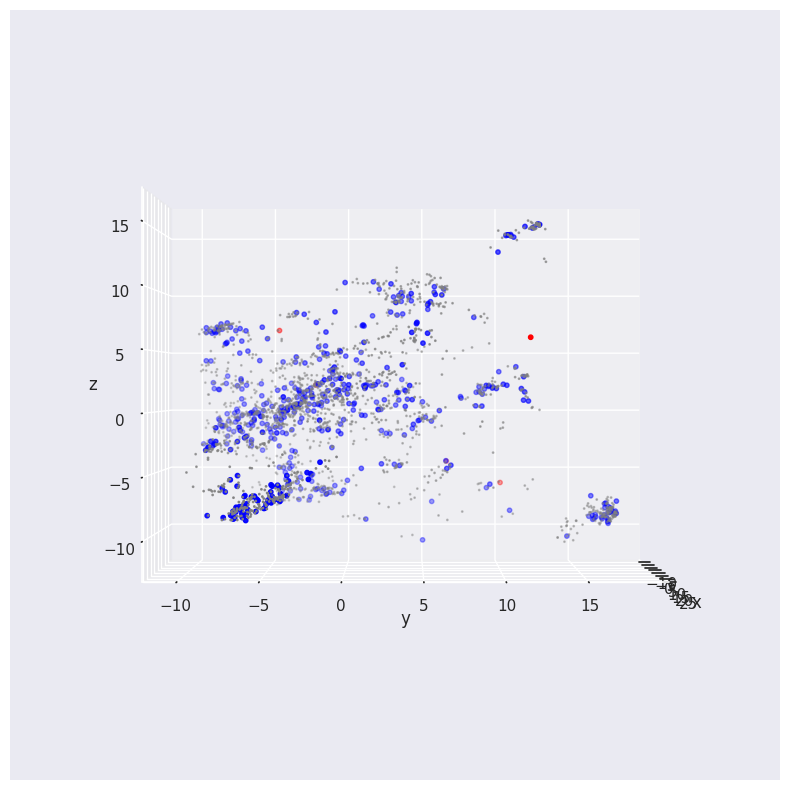

In [19]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.animation import FuncAnimation, PillowWriter,FFMpegWriter
plt.close()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
elev = azim = roll = 0
def animate(i):
    angle=i/2
    ax.clear()

    cmap = sns.color_palette("crest", as_cmap=True)

    points1 = ax.scatter(pca_df.x, pca_df.y, pca_df.z,c='grey',s=1)
    points2 = ax.scatter(in_predict[:,0], in_predict[:,1],in_predict[:,2],c='blue',s=10)
    points3 = ax.scatter(out_predict[:,0], out_predict[:,1],out_predict[:,2],c='red',s=10)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # for simplex in convex.simplices:
    #         ax.plot(pca_proj[simplex, 0], pca_proj[simplex, 1], 'k-',linewidth=1)
    ax.set_zlabel('z')
    

    # Normalize the angle to the range [-180, 180] for display
    angle_norm = (angle + 180) % 360 - 180

    # Cycle through a full rotation of elevation, then azimuth, roll, and all
    
    if angle <= 360:
        globals()['elev'] = angle_norm
    elif angle <= 360*2:
        globals()['azim'] = angle_norm
    # elif angle <= 360*3:
    #     globals()['roll'] = angle_norm
    else:
        globals()['elev'] = globals()['azim'] = globals()['roll'] = angle_norm

    # Update the axis view and title
    view = ax.view_init(elev=globals()['elev'], azim=globals()['azim'], roll=globals()['roll'])
    # plt.title('Elevation: %d°, Azimuth: %d°, Roll: %d°' % (elev, azim, roll))
    return points1,points2,points3,

ani = FuncAnimation(fig, animate, interval=200, blit=True, repeat=True, frames=360*6)    


In [21]:
from matplotlib.animation import FFMpegWriter
ani.save('./raw_data_features/Data_raw/hiv.mp4', dpi=300, writer = FFMpegWriter(fps=25),progress_callback = lambda i, n: print(f'Saved {i} of {n}') if i % 50 == 0 else 0)

Saved 0 of 2160
Saved 50 of 2160
Saved 100 of 2160
Saved 150 of 2160
Saved 200 of 2160
Saved 250 of 2160
Saved 300 of 2160
Saved 350 of 2160
Saved 400 of 2160
Saved 450 of 2160
Saved 500 of 2160
Saved 550 of 2160
Saved 600 of 2160
Saved 650 of 2160
Saved 700 of 2160
Saved 750 of 2160
Saved 800 of 2160
Saved 850 of 2160
Saved 900 of 2160
Saved 950 of 2160
Saved 1000 of 2160
Saved 1050 of 2160
Saved 1100 of 2160
Saved 1150 of 2160
Saved 1200 of 2160
Saved 1250 of 2160
Saved 1300 of 2160
Saved 1350 of 2160
Saved 1400 of 2160
Saved 1450 of 2160
Saved 1500 of 2160
Saved 1550 of 2160
Saved 1600 of 2160
Saved 1650 of 2160
Saved 1700 of 2160
Saved 1750 of 2160
Saved 1800 of 2160
Saved 1850 of 2160
Saved 1900 of 2160
Saved 1950 of 2160
Saved 2000 of 2160
Saved 2050 of 2160
Saved 2100 of 2160
Saved 2150 of 2160
